In [102]:
# Installing packages and initializing environment required for program below
# Package 1: Selenium, used to interact with the browser
# Package 2: ChromeDriver, used to open and create Google Chrome browser to operate with
# Package 3: ONNXRuntime, used as a machine learning model to simulate neural hash of images
# Package 4: Pillow (Python Imaging Library), used to modify the inserted images
# Package 5: OpenCV, used to select the first frame of a video and save it

import time
import sys 
!conda install --yes --prefix {sys.prefix} selenium
!conda install --yes --prefix {sys.prefix} chromedriver-binary
!conda install --yes --prefix {sys.prefix} opencv
#!conda install --yes --prefix {sys.prefix} onnxruntime
#!conda install --yes --prefix {sys.prefix} pillow

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [103]:
# Creating and opening a Google Chrome browser, downloading the video link
link = input("Please enter video link you want to download: ")

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

serv = Service("/Users/avery/.wdm/drivers/chromedriver/mac64/96.0.4664.45/chromedriver")
chrome_options = Options()
driver = webdriver.Chrome(service=serv, options=chrome_options)

if(link.find("www.tiktok.com") != -1):
    driver.get("https://snaptik.app/")
    driver.find_element(By.ID, "url").send_keys(link)
    driver.find_element(By.ID, "submiturl").click()
    time.sleep(7)
    driver.find_element(By.PARTIAL_LINK_TEXT, "Download Server 02 (SnapTik)").click()
    time.sleep(7)
    driver.quit()
    
else:
    driver.get("https://snapinsta.app/")
    driver.find_element(By.ID, "url").send_keys(link)
    driver.find_element(By.ID, "send").click()
    time.sleep(7)
    driver.find_element(By.PARTIAL_LINK_TEXT, "Download Video").click()
    time.sleep(7)
    driver.quit()

Please enter video link you want to download: https://www.instagram.com/reel/CXvzcVfO-N4/?utm_source=ig_web_copy_link


In [92]:
# Randomly selecting whether or not the video is modified for the post
import cv2
import numpy as np
import random

magic8 = random.randrange(2)
if(magic8 == 1):
    regular = "/Users/avery/Downloads/" + input("Please enter original video's file name: ")
    # Code modified and utilized from https://stackoverflow.com/questions/29317262/opencv-video-saving-in-python to flip the video
    cap = cv2.VideoCapture(regular)
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter('mirrored.mp4', fourcc, 30.0, (width,height))
    while(cap.isOpened()):
        ret, frame = cap.read()
        if(ret==True):
            # Mirrors the frame on the x-axis
            frame = cv2.flip(frame,1)
            out.write(frame)
            if(cv2.waitKey(1) & 0xFF == ord('q')):
                break
        else:
            break
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    mirrored = "/Users/avery/Downloads/mirrored.mp4"
else:
    pass

# Writing outputting result into a text file
selection = open("selection.txt", "w")
selection.write(str(magic8))
selection.close()
print("The selection " + str(magic8) + " has been recorded!")

Please enter original video's file name: SnapInsta_269042669_484933576593588_3726858475770358233_n.mp4
The selection 1 has been recorded!


In [106]:
# Comparing the hash of two videos
regular = "/Users/avery/Downloads/" + input("Please enter original video's file name: ")

# Code modified and utilized from https://stackoverflow.com/questions/29317262/opencv-video-saving-in-python to flip the video
cap = cv2.VideoCapture(regular)
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('mirrored.mp4', fourcc, 30.0, (width,height))
while(cap.isOpened()):
    ret, frame = cap.read()
    if(ret==True):
        # Mirrors the frame on the x-axis
        frame = cv2.flip(frame,1)
        out.write(frame)
        if(cv2.waitKey(1) & 0xFF == ord('q')):
            break
    else:
        break
cap.release()
out.release()
cv2.destroyAllWindows()
mirrored = "/Users/avery/Downloads/mirrored.mp4"

# Capturing the first frame of both the regular and mirrored video to compare neural hash
vidcap = cv2.VideoCapture(regular)
success,image = vidcap.read()
cv2.imwrite("regularframe.jpg", image)
vidcap = cv2.VideoCapture(mirrored)
success,image = vidcap.read()
cv2.imwrite("mirroredframe.jpg", image)

# Utilizing the first frame of the regular and mirrored video for the neural hash comparison
regularframe = "/Users/avery/Downloads/regularframe.jpg"
mirroredframe = "/Users/avery/Downloads/mirroredframe.jpg"

Please enter original video's file name: SnapInsta_269042669_484933576593588_3726858475770358233_n.mp4


# Code originally used to compare hashes resulting from NeuralHash
#Open source code referenced from https://github.com/AsuharietYgvar/AppleNeuralHash2ONNX/blob/master/nnhash.py
import onnxruntime
import numpy as np
from PIL import Image

#Load ONNX model
session = onnxruntime.InferenceSession(sys.argv[1])

#Load output hash matrix
seed1 = open(sys.argv[2], 'rb').read()[128:]
seed1 = np.frombuffer(seed1, dtype=np.float32)
seed1 = seed1.reshape([96, 128])

#Preprocess image
image = Image.open(sys.argv[3]).convert('RGB')
image = image.resize([360, 360])
arr = np.array(image).astype(np.float32) / 255.0
arr = arr * 2.0 - 1.0
arr = arr.transpose(2, 0, 1).reshape([1, 3, 360, 360])

#Run model
inputs = {session.get_inputs()[0].name: arr}
outs = session.run(None, inputs)

#Convert model output to hex hash
hash_output = seed1.dot(outs[0].flatten())
hash_bits = ''.join(['1' if it >= 0 else '0' for it in hash_output])
hash_hex = '{:0{}x}'.format(int(hash_bits, 2), len(hash_bits) // 4)
print(hash_hex)

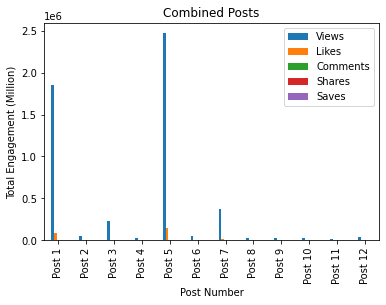

In [104]:
# Utilizing Instagram profile for engagement and creating visual graphs
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

selection = open("selection.txt")
output = selection.read()
index = ["Post 1","Post 2","Post 3","Post 4","Post 5","Post 6","Post 7","Post 8","Post 9","Post 10","Post 11","Post 12"]
df = pd.DataFrame({"Views": [1848069, 50626, 229358, 28363, 2472605, 50269, 373530, 24461, 30531, 31915, 18645, 38025], 
                   "Likes": [82001, 1587, 7767, 1823, 143325, 1330, 9062, 1120, 964, 1594, 1178, 2084],
                   "Comments": [74, 3, 70, 18, 197, 0, 4, 7, 39, 11, 20, 4],
                   "Shares": [938, 10, 334, 35, 4004, 12, 94, 19, 101, 66, 140, 12],
                   "Saves": [1537, 72, 231, 99, 5168, 57, 128, 134, 57, 92, 133, 55],
                   "Modified": [output[0], output[1], output[2], output[3], output[4], output[5], output[6], output[7], output[8], output[9], output[10], output[11]]}, index = index)
selection.close()
df.plot.bar()
plt.title('Combined Posts')
plt.xlabel('Post Number')
plt.ylabel('Total Engagement (Million)')
plt.show()

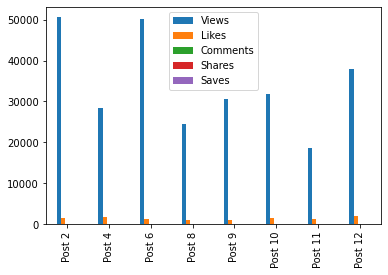

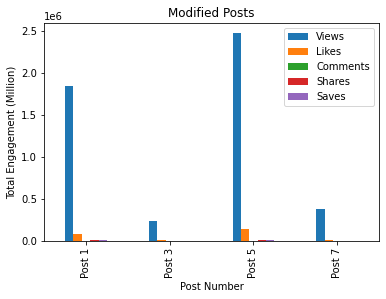

In [105]:
df1 = df.groupby(["Modified"])
df1.plot.bar()
plt.title('Modified Posts')
plt.xlabel('Post Number')
plt.ylabel('Total Engagement (Million)')
plt.show()